<a href="https://colab.research.google.com/github/kwy0828/DL2025/blob/main/16_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate synthetic data


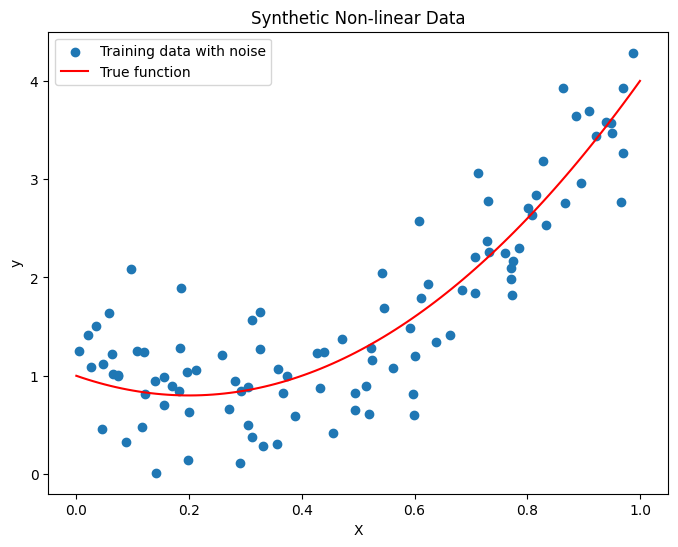

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the true function (non-linear)
def true_function(x):
    return 5 * x ** 2 - 2 * x + 1

# Generate synthetic data
n_samples_train = 100
n_samples_test = 50
noise_level = 0.5
# noise = np.random.randn(n_samples) * 0.5 # Adjust the scale of noise to control overfitting
X_train = np.random.rand(n_samples_train, 1)
y_train = true_function(X_train) + np.random.randn(n_samples_train, 1) * noise_level

X_test = np.linspace(0, 1, n_samples_test).reshape(-1, 1)
y_test = true_function(X_test) + np.random.randn(n_samples_test, 1) * noise_level

# Optional: Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Training data with noise')
plt.plot(np.linspace(0, 1, 100), true_function(np.linspace(0, 1, 100)), color='red', label='True function')>
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Non-linear Data')
plt.legend()
plt.show()

## Add polynomial features


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

## Define models

Define three different models: one without regularization (Linear Regression), one with L1 regularization (Lasso), and one with L2 regularization (Ridge).


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model_no_reg = LinearRegression()
model_l1 = Lasso(alpha=0.01)
model_l2 = Ridge(alpha=0.01)

## Train models

Train the three defined models using the generated data with polynomial features.


In [ ]:
model_no_reg.fit(X_train_poly, y_train)
model_l1.fit(X_train_poly, y_train)
model_l2.fit(X_train_poly, y_train)

Ridge(alpha=0.01)

## Visualize results

Visualize the predictions of the three models on the test data and compare them to the true function to show the effect of regularization.


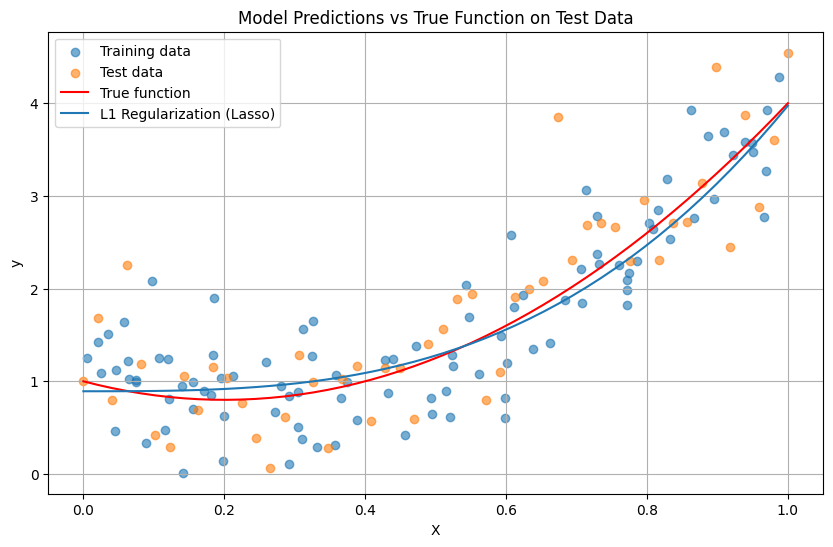

In [ ]:
y_pred_no_reg = model_no_reg.predict(X_test_poly)
y_pred_l1 = model_l1.predict(X_test_poly)
y_pred_l2 = model_l2.predict(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training data', alpha=0.6)
plt.scatter(X_test, y_test, label='Test data', alpha=0.6)
plt.plot(X_test, true_function(X_test), color='red', label='True function')
#plt.plot(X_test, y_pred_no_reg, label='No Regularization')
plt.plot(X_test, y_pred_l1, label='L1 Regularization (Lasso)')
#plt.plot(X_test, y_pred_l2, label='L2 Regularization (Ridge)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Predictions vs True Function on Test Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Display the coefficients of the trained models
print("Model Coefficients:")

print("\nNo Regularization Coefficients:")
display(model_no_reg.coef_)

print("\nL1 Regularization (Lasso) Coefficients:")
display(model_l1.coef_)

print("\nL2 Regularization (Ridge) Coefficients:")
display(model_l2.coef_)

Model Coefficients:

No Regularization Coefficients:


array([[-1.97766448e+01,  4.64745398e+02, -5.79381556e+03,
         3.91660625e+04, -1.54710435e+05,  3.73370868e+05,
        -5.56896262e+05,  5.00461656e+05, -2.48186091e+05,
         5.21463451e+04]])


L1 Regularization (Lasso) Coefficients:


array([-0.        ,  0.        ,  3.08113681,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])


L2 Regularization (Ridge) Coefficients:


array([-2.24041676,  2.34348263,  2.40597178,  1.49432221,  0.60116211,
       -0.03914815, -0.41649454, -0.58185958, -0.59200224, -0.49269355])